In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models, Model, optimizers
from keras.callbacks import ReduceLROnPlateau

In [2]:
# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD


In [6]:

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	# trainY = to_categorical(trainY)
	# testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY))
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)

    print('> %.3f' % (acc * 100.0))
    # learning curves

    y_pred = model.predict(testX)

    summarize_diagnostics(history)
    y_pred_classes = [np.argmax(element) for element in y_pred]



    print("\nconfusion matrix (TEST SET):\n", confusion_matrix(testY, y_pred_classes))
    print("\nconfusion matrix (Train SET):\n", confusion_matrix(trainY, [np.argmax(element) for element in model.predict(trainX)]))
    print("\nClassification Report: \n", classification_report(testY, y_pred_classes))

# entry point, run the test harness

0 input_2 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Epoch 1/20
782/782 [==============================] - 32s 40ms/step - loss: 1.1350 - accuracy: 0.6005 - val_loss: 0.7240 - val_accuracy: 0.7489
Epoch 2/20
782/782 [==============================] - 30s 38ms/step - loss: 0.6512 - accuracy: 0.7780 - val_loss: 0.6095 - val_accuracy: 0.7956
Epoch 3/20
782/782 [==============================] - 31s 39ms/step - loss: 0.5174 - accuracy: 0.8259 - val_loss: 0.5306 - val_accuracy: 0.8204
Epoch 4/20
782/782 [==============================] - 31s 39ms/step - loss: 0.4240 - accuracy: 0.8560 - val_loss: 0.5118 - val_accuracy: 0.8300
Epoch 5/20
782/782 [=========================

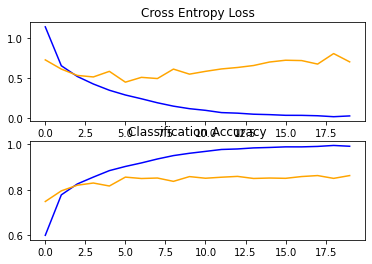


confusion matrix (TEST SET):
 [[900   5  16  16  10   1   8  13  24   7]
 [ 14 923   0   7   0   1   6   0   9  40]
 [ 31   1 815  64  43  17  18  10   0   1]
 [  4   4  23 796  23  83  33  24   2   8]
 [  6   1  39  59 837  13  13  28   2   2]
 [  5   1  18 180  16 735   7  33   1   4]
 [  3   1  21  49  12   8 898   2   4   2]
 [  8   2  10  32  23  19   0 902   0   4]
 [ 37   8   5  10   4   2   1   1 921  11]
 [ 24  41   3  10   0   1   2   7  12 900]]
1563/1563 [==============================] - 13s 8ms/step

confusion matrix (Train SET):
 [[4996    0    0    1    1    0    0    2    0    0]
 [   0 4999    0    0    0    0    0    0    1    0]
 [   2    0 4994    3    1    0    0    0    0    0]
 [   0    0    0 4998    0    1    0    1    0    0]
 [   0    0    3   11 4974    3    0    9    0    0]
 [   0    0    0   86    1 4902    0   11    0    0]
 [   0    0    0    4    1    1 4994    0    0    0]
 [   0    0    1    0    4    0    0 4995    0    0]
 [   2    0    0    0   

In [7]:
def define_model():

    vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
    # Freeze four convolution blocks
    for layer in vgg_model.layers[:0]:
        layer.trainable = False
    x = vgg_model.output
    x = Flatten()(x) # Flatten dimensions to for use in FC layers
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x) # Softmax for multiclass

    # Make sure you have frozen the correct layers
    for i, layer in enumerate(vgg_model.layers):
        print(i, layer.name, layer.trainable)

    model = Model(inputs=vgg_model.input, outputs=x)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model



0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 27s 33ms/step - loss: 1.1203 - accuracy: 0.6090 - val_loss: 0.7471 - val_accuracy: 0.7450
Epoch 2/20
782/782 [==============================] - 26s 33ms/step - loss: 0.6706 - accuracy: 0.7725 - val_loss: 0.6578 - val_accuracy: 0.7778
Epoch 3/20
782/782 [==============================] - 26s 33ms/step - loss: 0.5387 - accuracy: 0.8177 - val_loss: 0.5434 - val_accuracy: 0.8143
Epoch 4/20
782/782 [==============================] - 26s 33ms/step - loss: 0.4366 - accuracy: 0.8524 - val_loss: 0.5533 - val_accuracy: 0.8192
Epoch 5/20
782/782 [==============================] - 26s 33ms/step - loss: 0.3622 - accuracy: 0.8770 - val_loss: 0.5862 - val_accuracy: 0.8093
Epoch 6/20
782/782 [==============================] - 26s 33ms/step - loss: 0.2982 - accuracy: 0.9003 - val_loss: 0.5353 - val_accuracy: 0.8284
Epoch 7/20
782/782 [==============================] - 26s 33ms/step - loss: 0.2484 - accuracy: 0.9157 - val_loss: 0.5254 - val_accuracy:

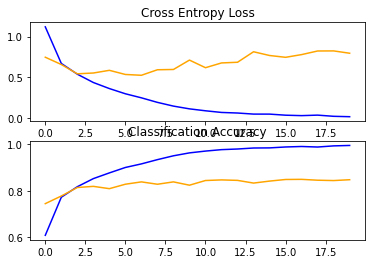


confusion matrix (TEST SET):
 [[885  10  18  15  13   1   3  13  19  23]
 [ 12 900   0   5   0   2   6   5  10  60]
 [ 38   1 786  48  59  22  23  21   0   2]
 [ 11   8  29 712  57 102  35  33   2  11]
 [ 10   1  31  32 866  13  17  22   3   5]
 [  3   0  15 147  34 740  13  43   0   5]
 [  3   4  16  44  22  20 881   2   2   6]
 [  7   3   8  28  45  21   1 879   1   7]
 [ 39   8   6   5   5   3   1   0 920  13]
 [ 12  45   4   6   1   2   5   6  11 908]]
1563/1563 [==============================] - 13s 8ms/step

confusion matrix (Train SET):
 [[4994    1    0    1    1    0    0    1    0    2]
 [   0 4994    0    0    0    0    1    0    0    5]
 [   6    0 4978    7    2    5    0    2    0    0]
 [   4    0    1 4979    5    4    3    4    0    0]
 [   0    0    1    1 4997    1    0    0    0    0]
 [   0    0    1   23    5 4962    2    7    0    0]
 [   0    0    1    2    1    1 4995    0    0    0]
 [   0    0    0    1    5    1    0 4993    0    0]
 [   7    0    0    1   

In [8]:
def define_model():

    vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
    # Freeze four convolution blocks
    for layer in vgg_model.layers[:7]:
        layer.trainable = False
    x = vgg_model.output
    x = Flatten()(x) # Flatten dimensions to for use in FC layers
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x) # Softmax for multiclass

    # Make sure you have frozen the correct layers
    for i, layer in enumerate(vgg_model.layers):
        print(i, layer.name, layer.trainable)

    model = Model(inputs=vgg_model.input, outputs=x)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

run_test_harness()


0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 24s 30ms/step - loss: 1.1739 - accuracy: 0.5866 - val_loss: 0.8858 - val_accuracy: 0.6951
Epoch 2/20
782/782 [==============================] - 23s 29ms/step - loss: 0.7647 - accuracy: 0.7371 - val_loss: 0.7791 - val_accuracy: 0.7318
Epoch 3/20
782/782 [==============================] - 23s 29ms/step - loss: 0.6271 - accuracy: 0.7865 - val_loss: 0.6928 - val_accuracy: 0.7594
Epoch 4/20
782/782 [==============================] - 23s 29ms/step - loss: 0.5319 - accuracy: 0.8175 - val_loss: 0.6487 - val_accuracy: 0.7849
Epoch 5/20
782/782 [==============================] - 23s 29ms/step - loss: 0.4539 - accuracy: 0.8449 - val_loss: 0.6355 - val_accuracy: 0.7923
Epoch 6/20
782/782 [==============================] - 23s 29ms/step - loss: 0.3830 - accuracy: 0.8695 - val_loss: 0.7236 - val_accuracy: 0.7779
Epoch 7/20
782/782 [==============================] - 23s 29ms/step - loss: 0.3154 - accuracy: 0.8920 - val_loss: 0.6621 - val_accuracy:

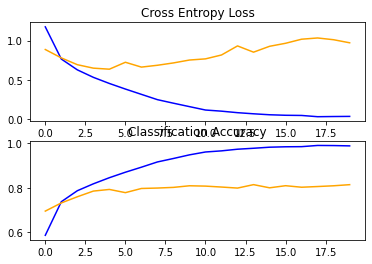


confusion matrix (TEST SET):
 [[873   8  32  12   9   1   1  12  30  22]
 [ 13 897   7   7   2   3   2   0  17  52]
 [ 37   1 803  42  65  16  13  13   4   6]
 [  6  12  52 663  63 120  31  28   8  17]
 [  9   2  64  38 819  20  17  22   6   3]
 [  7   3  39 176  47 670  14  35   1   8]
 [  7   5  49  55  46  18 805   1  11   3]
 [ 13   1  15  42  57  29   1 830   5   7]
 [ 31  13   9  12   5   1   1   0 910  18]
 [ 14  63  10   8   0   3   6   6  23 867]]
1563/1563 [==============================] - 13s 8ms/step

confusion matrix (Train SET):
 [[4987    0    4    1    0    0    0    1    6    1]
 [   0 4997    1    0    0    0    0    0    0    2]
 [   2    0 4989    1    6    1    0    1    0    0]
 [   2    1    2 4976   15    3    0    0    1    0]
 [   0    0    7    4 4987    1    0    1    0    0]
 [   0    0    3   29    7 4958    2    0    1    0]
 [   6    1   29    9   22    0 4929    0    2    2]
 [   0    0    0    4    6    2    0 4988    0    0]
 [   3    1    0    1   

In [9]:
def define_model():

    vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
    # Freeze four convolution blocks
    for layer in vgg_model.layers[:11]:
        layer.trainable = False
    x = vgg_model.output
    x = Flatten()(x) # Flatten dimensions to for use in FC layers
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x) # Softmax for multiclass

    # Make sure you have frozen the correct layers
    for i, layer in enumerate(vgg_model.layers):
        print(i, layer.name, layer.trainable)

    model = Model(inputs=vgg_model.input, outputs=x)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

run_test_harness()


0 input_5 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 True
18 block5_pool True


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 14s 17ms/step - loss: 1.5797 - accuracy: 0.4428 - val_loss: 1.2271 - val_accuracy: 0.5651
Epoch 2/20
782/782 [==============================] - 14s 17ms/step - loss: 1.2282 - accuracy: 0.5711 - val_loss: 1.1244 - val_accuracy: 0.6028
Epoch 3/20
782/782 [==============================] - 13s 16ms/step - loss: 1.1344 - accuracy: 0.6080 - val_loss: 1.0548 - val_accuracy: 0.6305
Epoch 4/20
782/782 [==============================] - 13s 16ms/step - loss: 1.0755 - accuracy: 0.6256 - val_loss: 1.0402 - val_accuracy: 0.6340
Epoch 5/20
782/782 [==============================] - 13s 16ms/step - loss: 1.0323 - accuracy: 0.6385 - val_loss: 0.9817 - val_accuracy: 0.6563
Epoch 6/20
782/782 [==============================] - 13s 16ms/step - loss: 1.0084 - accuracy: 0.6483 - val_loss: 0.9835 - val_accuracy: 0.6531
Epoch 7/20
782/782 [==============================] - 13s 16ms/step - loss: 0.9769 - accuracy: 0.6573 - val_loss: 0.9766 - val_accuracy:

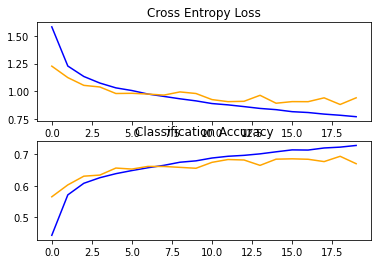


confusion matrix (TEST SET):
 [[844   6  33  22   5   9   4  15  33  29]
 [ 62 568  11  59   5  17  30   7  45 196]
 [ 70   0 616  89  65  48  82  18   2  10]
 [ 31   2  63 595  22 155  73  20   6  33]
 [ 38   2  76 111 513  63  90  86  11  10]
 [ 20   1  46 229  24 598  31  34   0  17]
 [  9   2  53  95  21  55 747   4   5   9]
 [ 28   2  45  68  46  67  11 708   2  23]
 [145  23  21  34   7   4  12   5 717  32]
 [ 54  19  15  49   2  13   9  17  27 795]]
1563/1563 [==============================] - 13s 8ms/step

confusion matrix (Train SET):
 [[4469   13  121   73   28   25   12   41   95  123]
 [ 274 3179   51  183   20   44  103   27  182  937]
 [ 252    0 3576  310  231  232  271   85   17   26]
 [  99    1  258 3350  101  739  269   85   25   73]
 [ 201    0  318  439 2987  279  355  343   22   56]
 [  68    2  181  961  111 3313  145  172    4   43]
 [  36    4  217  395   87  171 4039   16   11   24]
 [ 104    2  127  261  227  291   35 3861   10   82]
 [ 546   50   87  134   

In [10]:
def define_model():

    vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
    # Freeze four convolution blocks
    for layer in vgg_model.layers[:17]:
        layer.trainable = False
    x = vgg_model.output
    x = Flatten()(x) # Flatten dimensions to for use in FC layers
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x) # Softmax for multiclass

    # Make sure you have frozen the correct layers
    for i, layer in enumerate(vgg_model.layers):
        print(i, layer.name, layer.trainable)

    model = Model(inputs=vgg_model.input, outputs=x)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

run_test_harness()


0 input_6 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 13s 15ms/step - loss: 1.9782 - accuracy: 0.2890 - val_loss: 1.6650 - val_accuracy: 0.4265
Epoch 2/20
782/782 [==============================] - 12s 15ms/step - loss: 1.6487 - accuracy: 0.4201 - val_loss: 1.5080 - val_accuracy: 0.4734
Epoch 3/20
782/782 [==============================] - 12s 15ms/step - loss: 1.5354 - accuracy: 0.4598 - val_loss: 1.4351 - val_accuracy: 0.4950
Epoch 4/20
782/782 [==============================] - 12s 15ms/step - loss: 1.4693 - accuracy: 0.4850 - val_loss: 1.3873 - val_accuracy: 0.5104
Epoch 5/20
782/782 [==============================] - 11s 15ms/step - loss: 1.4260 - accuracy: 0.4986 - val_loss: 1.3583 - val_accuracy: 0.5214
Epoch 6/20
782/782 [==============================] - 12s 15ms/step - loss: 1.3971 - accuracy: 0.5095 - val_loss: 1.3326 - val_accuracy: 0.5320
Epoch 7/20
782/782 [==============================] - 12s 15ms/step - loss: 1.3692 - accuracy: 0.5206 - val_loss: 1.3099 - val_accuracy:

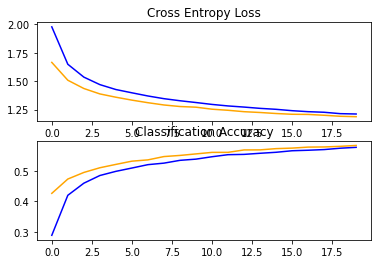


confusion matrix (TEST SET):
 [[645  24  82  16   9  10  16  21 123  54]
 [ 38 641  15  25   7  11  34  18  35 176]
 [ 74  28 488  59  87  48 131  51  14  20]
 [ 18  44  73 386  42 109 166  60  25  77]
 [ 25  18  98  38 472  17 153 106  43  30]
 [ 10  27  90 174  57 440  69  89   6  38]
 [  6  29  51  55  46  25 738   8  11  31]
 [ 23  19  56  39  59  49  21 647  15  72]
 [ 91  67  12  23   6   0  16   7 704  74]
 [ 47 114   7  25   8  12  24  34  55 674]]
1563/1563 [==============================] - 13s 8ms/step

confusion matrix (Train SET):
 [[3366  151  345   69   60   25   82  124  525  253]
 [ 139 3274   58  116   33   53  149   74  241  863]
 [ 354   96 2629  215  404  183  624  280  119   96]
 [ 103  198  370 1984  214  648  756  262  121  344]
 [ 167   53  431  223 2464   94  660  556  159  193]
 [  43  134  411  812  229 2257  426  462   37  189]
 [  32  106  279  242  198  138 3808   49   55   93]
 [ 106   58  258  198  337  201  112 3381   63  286]
 [ 367  285   95   68   

In [11]:
def define_model():

    vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
    # Freeze four convolution blocks
    for layer in vgg_model.layers[:19]:
        layer.trainable = False
    x = vgg_model.output
    x = Flatten()(x) # Flatten dimensions to for use in FC layers
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x) # Softmax for multiclass

    # Make sure you have frozen the correct layers
    for i, layer in enumerate(vgg_model.layers):
        print(i, layer.name, layer.trainable)

    model = Model(inputs=vgg_model.input, outputs=x)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

run_test_harness()
